In [1]:
import glob
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
from scipy import stats

import scipy.signal as sig


%matplotlib inline

plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15

In [77]:
inputfiles = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/HHV/*GATE*2018-02-27*.txt")
slow_tables = []

for file in inputfiles:
    with open(file) as f:
        slow_tables.append(pd.read_table(f, sep="\t", header=0))    
gate_table = pd.concat(slow_tables)
gate_table = gate_table[gate_table.Date != 'Date']
gate_voltage = gate_table.iloc[ ::2]
gate_current = gate_table.iloc[1::2]

#sel = slow_table.Event.values == 'SPARK DETECTED!!!'
slow_dates_g = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S') for date in (gate_voltage.Date + " " + gate_voltage.Hour).values])
slow_dates_ts_g = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S').timestamp() for date in (gate_voltage.Date + " " + gate_voltage.Hour).values])
dates_g = mpl.dates.date2num(slow_dates)
#slow_pressure = np.array([float(pres.replace(',', '.')) for pres in slow_table.PG3])

/Users/ansimez/miniconda/envs/IC3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
inputfiles = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/HHV/*CATHODE*2018-02-27*.txt")
slow_tables = []

for file in inputfiles:
    with open(file) as f:
        slow_tables.append(pd.read_table(f, sep="\t", header=0))    
cath_table = pd.concat(slow_tables)
cath_table = cath_table[cath_table.Date != 'Date']
cath_voltage = cath_table.iloc[ ::2]
cath_current = cath_table.iloc[1::2]

#sel = slow_table.Event.values == 'SPARK DETECTED!!!'
slow_dates_c = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S') for date in (cath_current.Date + " " + cath_current.Hour).values])
slow_dates_ts_c = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S').timestamp() for date in (cath_current.Date + " " + cath_current.Hour).values])
dates_c = mpl.dates.date2num(slow_dates)
#slow_pressure = np.array([float(pres.replace(',', '.')) for pres in slow_table.PG3])

/Users/ansimez/miniconda/envs/IC3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
inputfiles = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/HHV/*GATE*2018-02-26*.txt")
slow_tables = []

for file in inputfiles:
    with open(file) as f:
        slow_tables.append(pd.read_table(f, sep="\t", header=0, skiprows=[0,1]))    
gate_table = pd.concat(slow_tables)

#slow_voltage = slow_table.iloc[ ::2]
#slow_current = slow_table.iloc[1::2]

#sel = slow_table.Event.values == 'SPARK DETECTED!!!'
slow_dates_g = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S') for date in (gate_table.Date + " " + gate_table.Hour).values])
slow_dates_ts_g = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S').timestamp() for date in (gate_table.Date + " " + gate_table.Hour).values])
dates_g = mpl.dates.date2num(slow_dates)
#slow_pressure = np.array([float(pres.replace(',', '.')) for pres in slow_table.PG3])

ParserError: Error tokenizing data. C error: Expected 3 fields in line 336, saw 4


In [25]:
len(slow_dates)

45163

In [26]:
inputfiles = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/HHV/*CATHODE*.txt")
slow_tables = []

for file in inputfiles:
    with open(file) as f:
        slow_tables.append(pd.read_table(f, sep="\t", header=0, skiprows=[0,1]))    
cath_table = pd.concat(slow_tables)

#slow_voltage = slow_table.iloc[ ::2]
#slow_current = slow_table.iloc[1::2]

#sel = slow_table.Event.values == 'SPARK DETECTED!!!'
slow_dates_c = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S') for date in (cath_table.Date + " " + cath_table.Hour).values])
slow_dates_ts_c = np.array([datetime.strptime(date, '%d/%m/%Y %H:%M:%S').timestamp() for date in (cath_table.Date + " " + cath_table.Hour).values])
dates_c = mpl.dates.date2num(slow_dates)
#slow_pressure = np.array([float(pres.replace(',', '.')) for pres in slow_table.PG3])

In [27]:
len(slow_dates)

45163

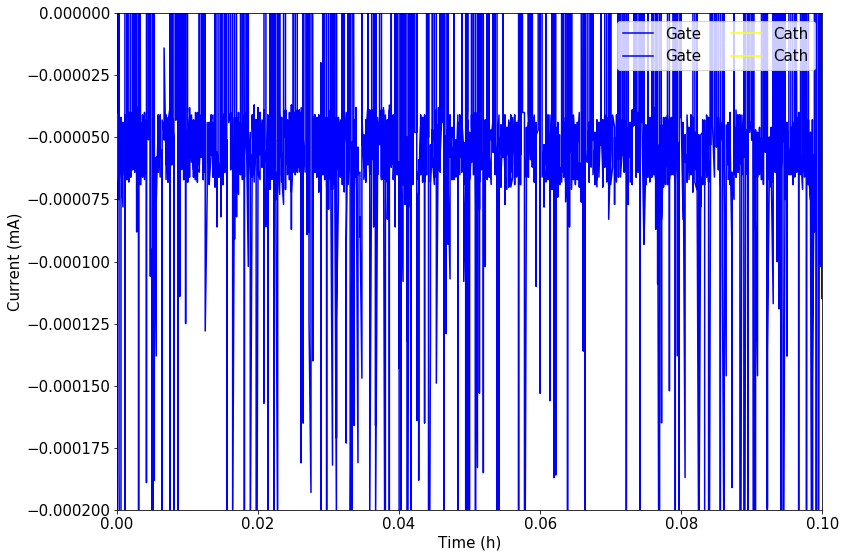

In [122]:
start_date = '26/02/2018 00:10:00'
end_date   = '27/02/2018 10:15:00'

start_date = datetime.strptime(start_date, '%d/%m/%Y %H:%M:%S').timestamp()
end_date   = datetime.strptime(end_date  , '%d/%m/%Y %H:%M:%S').timestamp()

fig, axes = plt.subplots(1, 1, figsize=(12,8))

#analytic_signal    = sig.hilbert(slow_table['Current (mA)'].values, 100)
#amplitude_envelope = np.abs(analytic_signal)


sel_c = coref.in_range(slow_dates_ts_c, start_date, end_date) & np.array([not isinstance(i, str) for i in cath_current['Event'].values])
sel_cv = coref.in_range(slow_dates_ts_c, start_date, end_date) & np.array([not isinstance(i, str) for i in cath_voltage['Event'].values])[:-1]
sel_g = coref.in_range(slow_dates_ts_g, start_date, end_date) & np.array([not isinstance(i, str) for i in gate_current['Event'].values])
sel_gv = coref.in_range(slow_dates_ts_g, start_date, end_date) & np.array([not isinstance(i, str) for i in gate_voltage['Event'].values])

#sel_c = sel_c & (cath_current['Event'].values < 5000)
#sel_cv = sel_cv & (cath_voltage['Event'].values < 5000)[:-1]
#sel_g = sel_g & (gate_current['Event'].values > -5000)
#sel_gv = sel_gv & (gate_voltage['Event'].values > -5000)

times_c = (slow_dates_ts_c[sel_c] - slow_dates_ts_c[0])/3600
times_g = (slow_dates_ts_g[sel_g] - slow_dates_ts_g[0])/3600

#envelope_index = sig.argrelextrema(slow_table['Current (mA)'][sel].values, np.greater, order=90)
#envelope_amp   = slow_table['Current (mA)'][sel].values[envelope_index]
#envelope_times = slow_dates[sel][envelope_index]
#envelope_times_ts = (slow_dates_ts[sel][envelope_index] - slow_dates_ts[0])/3600

axes.plot(times_g, gate_current['Event'].values[sel_g], label = 'Gate', c='b')
axes.plot(times_g[:-1], gate_voltage['Event'].values[sel_gv], label = 'Gate', c='b')
axes.plot(times_c, -cath_current['Event'].values[sel_c], label = 'Cath', c='yellow')
axes.plot(times_c, -cath_voltage['Event'].values[:-1][sel_cv], label = 'Cath', c='yellow')
#axes.plot(slow_dates[sel], slow_table['Current (mA)'][sel].values)
#axes.plot(envelope_times_ts, envelope_amp)
#axes.set_xticks(axes.get_xticks()[::2])

axes.set_ylabel("Current (mA)")
axes.set_xlabel("Time (h)")
axes.set_ylim(-0.0002, 0.000)
axes.set_xlim(0., 0.1)

leg = plt.legend(loc='best', ncol=2, fancybox=True)

fig.tight_layout()
fig.savefig("/Users/ansimez/Documents/InvCit/hdf5/HHV/8.5kV_currents.png")
#axes.plot(slow_dates[sel], slow_table['Voltage (V)'][sel].values)

In [93]:
gate_current

,Date,Hour,Event
1,26/02/2018,23:56:10,-8000.01
3,26/02/2018,23:56:10,-8000
5,26/02/2018,23:56:10,-8000.02
7,26/02/2018,23:56:11,-7999.95
9,26/02/2018,23:56:11,-7984.17
11,26/02/2018,23:56:11,-8000
13,26/02/2018,23:56:11,-8000.01
15,26/02/2018,23:56:11,-8000
17,26/02/2018,23:56:11,-7999.98
19,26/02/2018,23:56:12,-7999.98


In [92]:
np.array([not isinstance(i, str) for i in gate_current['Event'].values])

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [81]:
len(sel_c)

341104

IndexError: boolean index did not match indexed array along dimension 0; dimension is 61141 but corresponding boolean dimension is 62293

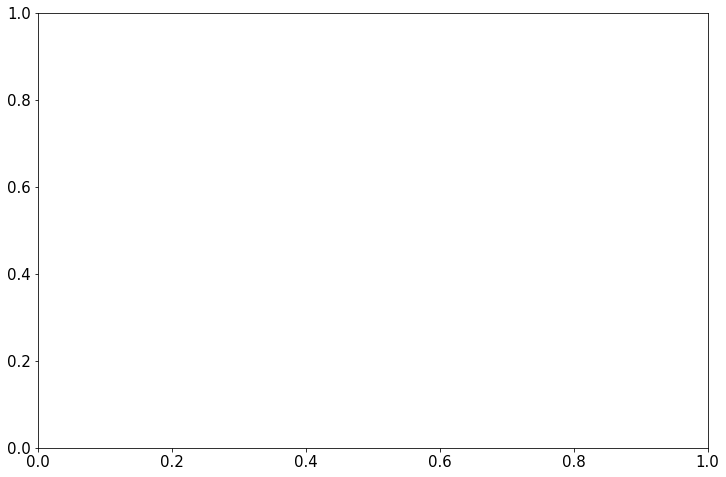

In [7]:
start_date = '12/06/2018 00:01:00'
end_date   = '12/06/2018 23:59:00'

start_date = datetime.strptime(start_date, '%d/%m/%Y %H:%M:%S').timestamp()
end_date   = datetime.strptime(end_date  , '%d/%m/%Y %H:%M:%S').timestamp()

fig, axes = plt.subplots(1, 1, figsize=(12,8))

sel = coref.in_range(slow_dates_ts, start_date, end_date)

times = (slow_dates_ts[sel] - start_date)/3600

axes.plot(times, gate_table['Current (mA)'].values[sel], label = 'Gate')
axes.plot(times, -cath_table['Current (mA)'].values[sel], label = 'Cath', c='yellow')
#axes.plot(slow_dates[sel], slow_table['Current (mA)'][sel].values)
#axes.plot(envelope_times_ts, envelope_amp)
#axes.set_xticks(axes.get_xticks()[::2])

axes.set_ylabel("Current (mA)")
axes.set_xlabel("Time (h)")
#axes.set_xlim(0., 7)


gate_mean = []
gate_rms  = []

cath_mean = []
cath_rms  = []

times     = []


cath_mean_all = -cath_table['Current (mA)'].values[sel].mean()
cath_std_all = cath_table['Current (mA)'].values[sel].std()
gate_mean_all = gate_table['Current (mA)'].values[sel].mean()
gate_std_all = gate_table['Current (mA)'].values[sel].std()


for t in np.arange(start_date, end_date, 1800):
    times.append((t-start_date)/3600)

    sel = coref.in_range(slow_dates_ts, t, t+1800)

    gate_current = gate_table['Current (mA)'].values[sel]
    gate_mean.append(gate_current.mean())
    gate_rms.append(gate_current.std())

    
    cath_current = -cath_table['Current (mA)'].values[sel]
    cath_mean.append(cath_current.mean())
    cath_rms.append(cath_current.std()) 
    
axes.plot(times, gate_mean, c='black', label=f'Gate mean {gate_mean_all:.5f}')
axes.plot(times, gate_rms, c='black', ls='--', label=f'Gate std {gate_std_all:.5f}')
axes.plot(times, cath_mean, c= 'red', label=f'Cath mean {cath_mean_all:.5f}')
axes.plot(times, cath_rms, c= 'red', ls='--', label=f'Cath std {cath_std_all:.5f}')

leg = plt.legend(loc='best', ncol=2, fancybox=True)
axes.set_ylim(-0.0005, 0.0015)


fig.tight_layout()
fig.savefig("/Users/ansimez/Documents/InvCit/hdf5/HHV/8kV_currents.png")

#axes.plot(slow_dates[sel], slow_table['Voltage (V)'][sel].values)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 61141 but corresponding boolean dimension is 62293

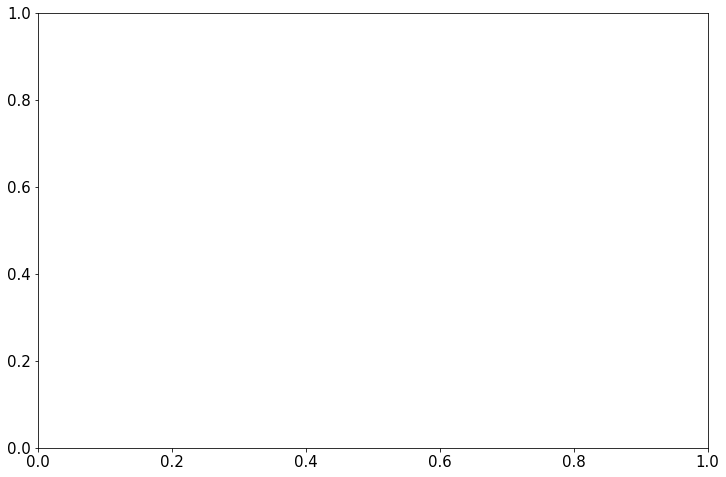

In [7]:
start_date = '12/06/2018 00:01:00'
end_date   = '12/06/2018 23:59:00'

start_date = datetime.strptime(start_date, '%d/%m/%Y %H:%M:%S').timestamp()
end_date   = datetime.strptime(end_date  , '%d/%m/%Y %H:%M:%S').timestamp()

fig, axes = plt.subplots(1, 1, figsize=(12,8))

sel = coref.in_range(slow_dates_ts, start_date, end_date)

times = (slow_dates_ts[sel] - start_date)/3600

axes.plot(times, gate_table['Current (mA)'].values[sel], label = 'Gate')
axes.plot(times, -cath_table['Current (mA)'].values[sel], label = 'Cath', c='yellow')
#axes.plot(slow_dates[sel], slow_table['Current (mA)'][sel].values)
#axes.plot(envelope_times_ts, envelope_amp)
#axes.set_xticks(axes.get_xticks()[::2])

axes.set_ylabel("Current (mA)")
axes.set_xlabel("Time (h)")
#axes.set_xlim(0., 7)


gate_mean = []
gate_rms  = []

cath_mean = []
cath_rms  = []

times     = []


cath_mean_all = -cath_table['Current (mA)'].values[sel].mean()
cath_std_all = cath_table['Current (mA)'].values[sel].std()
gate_mean_all = gate_table['Current (mA)'].values[sel].mean()
gate_std_all = gate_table['Current (mA)'].values[sel].std()


for t in np.arange(start_date, end_date, 1800):
    times.append((t-start_date)/3600)

    sel = coref.in_range(slow_dates_ts, t, t+1800)

    gate_current = gate_table['Current (mA)'].values[sel]
    gate_mean.append(gate_current.mean())
    gate_rms.append(gate_current.std())

    
    cath_current = -cath_table['Current (mA)'].values[sel]
    cath_mean.append(cath_current.mean())
    cath_rms.append(cath_current.std()) 
    
axes.plot(times, gate_mean, c='black', label=f'Gate mean {gate_mean_all:.5f}')
axes.plot(times, gate_rms, c='black', ls='--', label=f'Gate std {gate_std_all:.5f}')
axes.plot(times, cath_mean, c= 'red', label=f'Cath mean {cath_mean_all:.5f}')
axes.plot(times, cath_rms, c= 'red', ls='--', label=f'Cath std {cath_std_all:.5f}')

leg = plt.legend(loc='best', ncol=2, fancybox=True)
axes.set_ylim(-0.0005, 0.0015)


fig.tight_layout()
fig.savefig("/Users/ansimez/Documents/InvCit/hdf5/HHV/8kV_currents.png")

#axes.plot(slow_dates[sel], slow_table['Voltage (V)'][sel].values)

In [97]:
len(np.arange(start_date, end_date, 1800))

48

In [32]:
gate_rms

[0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559,
 0.00023393972824513559]

In [1]:
y = envelope_amp
x = envelope_times_ts - envelope_times_ts[0]
seed = np.median(y), np.log(y[-1]/y[0])/(x[-1] - x[0])
print(seed)

f = fitf.fit(fitf.expo, x, y, seed, maxfev=10000)
plt.plot(x, y)
plt.plot(x, f.fn(x))

NameError: name 'envelope_amp' is not defined

In [168]:
f

FitFunction(fn=<function fit.<locals>.<lambda> at 0x12641f2f0>, values=array([ 0.0015705 ,  0.04030458]), errors=array([ inf,  inf]), chi2=inf, pvalue=0.0, cov=array([[ inf,  inf],
       [ inf,  inf]]))

In [146]:
seed

(0.0015705000000000001, 24811.074528532485)

In [134]:
(x[-1] - x[0])/np.log(y[-1]/y[0])

24811.074528532485

In [153]:
f

FitFunction(fn=<function fit.<locals>.<lambda> at 0x121f4df28>, values=array([  1.81558333e-03,   1.00000000e+21]), errors=array([ inf,  inf]), chi2=3.1457509166666658e-07, pvalue=1.0, cov=array([[ inf,  inf],
       [ inf,  inf]]))

In [121]:
f = fitf.fit(fitf.expo, envelope_times_ts, envelope_amp, seed)
axes.plot (envelope_times_ts, f.fn(envelope_times_ts))

f.fn(envelope_times_ts)

/Users/ansimez/miniconda/envs/IC3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [103]:
axes.plot(amplitude_envelope)


In [16]:
float(slow_table['Voltage (V)'].values[0])

ValueError: could not convert string to float: '-8699,91'

In [3]:
slow_table

NameError: name 'slow_table' is not defined

In [32]:
slow_table.iloc[100::]

,Date,Hour,Event
100,09/11/2017,4:12:35,"-8499,52"
101,09/11/2017,4:12:35,"0,000152"
102,09/11/2017,4:17:35,"-8499,60"
103,09/11/2017,4:17:35,"0,000302"
104,09/11/2017,4:22:35,"-8499,55"
105,09/11/2017,4:22:35,"0,000092"
106,09/11/2017,4:27:35,"-8499,57"
107,09/11/2017,4:27:35,"0,000038"
108,09/11/2017,4:32:35,"-8499,56"
109,09/11/2017,4:32:35,"0,000043"


In [ ]:
slow_table.Event[slow_table.]

In [36]:
slow_table.Date[slow_table.Event.values == 'SPARK DETECTED!!!']

118    09/11/2017
554    10/11/2017
300    16/11/2017
Name: Date, dtype: object

In [37]:
slow_table.Hour[slow_table.Event.values == 'SPARK DETECTED!!!']

118     4:56:31
554    23:05:38
300    12:32:26
Name: Hour, dtype: object

In [39]:
slow_dates

[1510199791.0, 1510351538.0, 1510831946.0]

In [28]:
slow_dates = []
for date in (slow_table.Date + " " + slow_table.Hour).values:
    print(date)
    slow_dates.append(datetime.strptime(date, '%d/%m/%Y %H:%M:%S').timestamp())


09/11/2017 0:02:25
09/11/2017 0:02:25
09/11/2017 0:07:25
09/11/2017 0:07:25
09/11/2017 0:12:26
09/11/2017 0:12:26
09/11/2017 0:17:26
09/11/2017 0:17:26
09/11/2017 0:22:26
09/11/2017 0:22:26
09/11/2017 0:27:26
09/11/2017 0:27:26
09/11/2017 0:32:26
09/11/2017 0:32:26
09/11/2017 0:37:27
09/11/2017 0:37:27
09/11/2017 0:42:27
09/11/2017 0:42:27
09/11/2017 0:47:27
09/11/2017 0:47:27
09/11/2017 0:52:27
09/11/2017 0:52:27
09/11/2017 0:57:28
09/11/2017 0:57:28
09/11/2017 1:02:28
09/11/2017 1:02:28
09/11/2017 1:07:28
09/11/2017 1:07:28
09/11/2017 1:12:28
09/11/2017 1:12:28
09/11/2017 1:17:28
09/11/2017 1:17:28
09/11/2017 1:22:28
09/11/2017 1:22:28
09/11/2017 1:27:29
09/11/2017 1:27:29
09/11/2017 1:32:29
09/11/2017 1:32:29
09/11/2017 1:37:29
09/11/2017 1:37:29
09/11/2017 1:42:29
09/11/2017 1:42:29
09/11/2017 1:47:29
09/11/2017 1:47:29
09/11/2017 1:52:30
09/11/2017 1:52:30
09/11/2017 1:57:30
09/11/2017 1:57:30
09/11/2017 2:02:30
09/11/2017 2:02:30
09/11/2017 2:07:30
09/11/2017 2:07:30
09/11/2017 2

TypeError: strptime() argument 1 must be str, not float

In [26]:
slow_dates = [ datetime.strptime(date, '%d/%m/%Y %H:%M:%S').timestamp() for date in (slow_table.Date + " " + slow_table.Hour).values]

TypeError: strptime() argument 1 must be str, not float

In [20]:
date

AttributeError: 'str' object has no attribute 'dtype'

In [12]:
slow_current

,Date,Hour,Event
1,09/11/2017,0:02:25,"-0,000039"
3,09/11/2017,0:07:25,"0,000339"
5,09/11/2017,0:12:26,"-0,000036"
7,09/11/2017,0:17:26,"0,000032"
9,09/11/2017,0:22:26,"0,000302"
11,09/11/2017,0:27:26,"0,000146"
13,09/11/2017,0:32:26,"0,000163"
15,09/11/2017,0:37:27,"0,000048"
17,09/11/2017,0:42:27,"0,000197"
19,09/11/2017,0:47:27,"-0,000043"


In [46]:
print(f'{5.5*100} g/L')

550.0 g/L


In [45]:
print(f'{5.5} kg/m')

5.5 kg/m
